## 1D Quantum Harmonic Oscillator
For reference [Oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)

[Sympy](https://www.sympy.org/en/index.html)

Before examining the Quantum 1D Simple Harmonic Oscillator, the relevant files need to be loaded to create simple
harmonic oscillator states and operators.

In [13]:
#%load_ext sympy.interactive.ipythonprinting
from sympy import init_printing
from sympy import Symbol, Integer
from sympy.physics.quantum import (Dagger,
qapply,
represent,
InnerProduct,
Commutator)
from sympy.physics.quantum.sho1d import (RaisingOp,
LoweringOp,
NumberOp,
Hamiltonian,
SHOKet,
SHOBra)
from sympy.printing import latex

In [14]:
# We create generic bra and ket in the following way
b = SHOBra('b')
b0 = SHOBra(0)
b1 = SHOBra(1)
k = SHOKet('k')
k0 = SHOKet(0)
k1 = SHOKet(1)

In [15]:
b

In [16]:
b0

In [17]:
b1

In [18]:
k

In [19]:
k0

In [20]:
k1

In [21]:
#How to printout using Latex command?
latex(b)

'{\\left\\langle b\\right|}'

In [22]:
latex(b0)

'{\\left\\langle 0\\right|}'

In [27]:
import pprint #Data Pretty Printer
pprint.pprint(b)
pprint.pprint(b0)
pprint.pprint(k0)

<b|
<0|
|0>


In [28]:
repr(b)

'<b|'

In [29]:
repr(b1)

'<1|'

In [30]:
repr(b0)

'<0|'

In [33]:
from sympy import *
srepr(b)#Symbol representation

"SHOBra(Symbol('b'))"

In [34]:
srepr(b0)

'SHOBra(Integer(0))'

In [35]:
srepr(b1)

'SHOBra(Integer(1))'

In [36]:
k1

In [37]:
k0

In [38]:
k

In [39]:
latex(k)

'{\\left|k\\right\\rangle }'

In [40]:
pprint(k0)

❘0⟩


In [41]:
repr(k1)

'|1>'

In [42]:
b.hilbert_space

In [43]:
b0.hilbert_space

### Operators
The states are acted upon by operators. There are four operators that act on simple harmonic kets: RaisingOp,
LoweringOp, NumberOp, and Hamiltonian.

In [44]:
ad = RaisingOp('a')
a = LoweringOp('a')
N = NumberOp('N')
H = Hamiltonian('H')

In [45]:
ad

In [46]:
a

In [48]:
latex(ad)#How to write this operator in Latex?

'a^{\\dagger}'

In [49]:
pprint(ad)

 †
a 


In [50]:
repr(ad)

'RaisingOp(a)'

In [51]:
srepr(ad)

"RaisingOp(Symbol('a'))"

### Properties of Hillbert Space

In [52]:
ad.hilbert_space

In [53]:
a.hilbert_space

In [54]:
N.hilbert_space

In [55]:
H.hilbert_space

Some more properties and operations

In [56]:
Dagger(b)

In [57]:
Dagger(k)

In [58]:
Dagger(b0)

In [59]:
Dagger(k1) == b1

True

In [60]:
Dagger(b1) == k0

False

In [61]:
Dagger(a)

The operators can be expressed in terms of other operators. Aside from the operators stated above rewriting in terms of the
position (X) and momentum operators (Px) is common. To rewrite the operators in terms of other operators, we pass a
keyword that specifies which operators to rewrite in.

'xp' -- Position and Momentum Operators

'a' -- Raising and Lowering Operators

'H' -- Hamiltonian Operator

'N' -- Number Operator

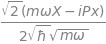

In [62]:
ad.rewrite('xp')# a dagger interms of X and Px

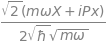

In [63]:
a.rewrite('xp')#a interms of X and Px

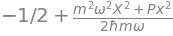

In [64]:
N.rewrite('xp')# Number operator interms of X and Px

In [65]:
N.rewrite('a')

In [66]:
N.rewrite('H')

In [67]:
H.rewrite('xp')

In [68]:
H.rewrite('a')

In [69]:
H.rewrite('N')

### Operator Method

Apply Operators to States: Each of the operators can act on kets using qapply.

The raising operator raises the value of the state by one as well as multiplies the state by the square root of the new state.

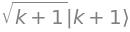

In [70]:
qapply(ad*k)

In [71]:
qapply(ad*k0)

In [72]:
qapply(ad*k1)

The lowering operator lowers the value of the state by one and multiples the state by the square root of the original state.
When the lowering operator acts on the ground state it returns zero because the state cannot be lowered.

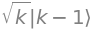

In [73]:
qapply(a*k)

In [74]:
qapply(a*k0)

In [75]:
qapply(a*k1)

The number operator is defined as the raising operator times the lowering operator. When the number operator acts on a
ket it returns the same state multiplied by the value of the state. This can be checked by applying the lowering operator on
a state then applying the raising operator to the result.

In [77]:
qapply(N*k)

In [78]:
qapply(N*k0)

In [79]:
qapply(N*k1)

In [80]:
result = qapply(a*k)
qapply(ad*result)

When the hamiltonian operator acts on a state it returns the energy of the state, which is equal to hbar*omega times the
value of the state plus one half.

In [82]:
qapply(H*k)

In [83]:
qapply(H*k0)

In [84]:
qapply(H*k1)

### Commutators

A commutator is defined as [A, B] = A*B - B*A where A and B are both operators. Commutators are used to see if operators
commute, which is an important property in quantum mechanics. If they commute it allows for rearranging the order
operators act on states.

In [85]:
Commutator(ad,a).doit()

In [86]:
Commutator(ad,N).doit()

In [87]:
Commutator(a,ad).doit()

In [88]:
Commutator(a,N).doit()

### Matrix Representation

The bras and kets can also be represented as a row or column vector, which are then used to create matrix representation
of the different operators. The bras and kets must be numerical states rather than a generic n state

In [89]:
represent(b0)

Matrix([[1, 0, 0, 0]])

In [90]:
represent(k0)

Matrix([
[1],
[0],
[0],
[0]])

Because these vectors and matrices are mostly zeros there is a different way of creating and storing these vectors/matrices,
that is to use the format scipy.sparse. The default format is sympy and another common format to use is numpy. Along with
specifying the format in which the matrices are created, the dimension of the matrices can also be specified. A dimension of
4 is the default.

In [91]:
represent(k1, ndim=5, format='sympy')

Matrix([
[0],
[1],
[0],
[0],
[0]])

In [92]:
represent(k1, ndim=5, format='numpy')

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [97]:
import scipy.sparse
represent(k1, ndim=5, format='scipy.sparse')

<5x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [98]:
represent(ad, ndim=4, format='sympy')

Matrix([
[0,       0,       0, 0],
[1,       0,       0, 0],
[0, sqrt(2),       0, 0],
[0,       0, sqrt(3), 0]])

In [99]:
represent(ad, format='numpy')

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 0.        , 0.        ],
       [0.        , 0.        , 1.73205081, 0.        ]])

In [100]:
represent(ad, format='scipy.sparse', spmatrix='lil')

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [101]:
represent(a)

Matrix([
[0, 1,       0,       0],
[0, 0, sqrt(2),       0],
[0, 0,       0, sqrt(3)],
[0, 0,       0,       0]])

In [102]:
represent(N)

Matrix([
[0, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 3]])

In [103]:
represent(H)

Matrix([
[hbar*omega/2,              0,              0,              0],
[           0, 3*hbar*omega/2,              0,              0],
[           0,              0, 5*hbar*omega/2,              0],
[           0,              0,              0, 7*hbar*omega/2]])